In [1]:
library(data.table)
library(tidyverse)
library(ggcorrplot)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

√ ggplot2 3.3.3     √ purrr   0.3.4
√ tibble  3.0.4     √ dplyr   1.0.2
√ tidyr   1.1.2     √ stringr 1.4.0
√ readr   1.4.0     √ forcats 0.5.0

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::between()   masks data.table::between()
x dplyr::filter()    masks stats::filter()
x dplyr::first()     masks data.table::first()
x dplyr::lag()       masks stats::lag()
x dplyr::last()      masks data.table::last()
x purrr::transpose() masks data.table::transpose()

Warning message:
"package 'ggcorrplot' was built under R version 4.0.5"


In [2]:
data = fread('C:/Users/fleur/2021 P-SAT/주제분석/주제분석 1주차/데이터/province_info.csv', data.table = FALSE)

In [3]:
data %>% head()

,sigungu,grdp,income_ct,income_personal,consumption,family,hospital_num
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,부산광역시 중구,70.16536,29388.16,19680.32,18029.58,23847,3
2,부산광역시 서구,28.67351,29388.16,19680.32,18029.58,53853,6
3,부산광역시 동구,53.24438,29388.16,19680.32,18029.58,46003,5
4,부산광역시 영도구,20.56649,29388.16,19680.32,18029.58,54903,5
5,부산광역시 부산진구,22.04011,29388.16,19680.32,18029.58,173263,30
6,부산광역시 동래구,14.53194,29388.16,19680.32,18029.58,114987,28


In [4]:
# 단위 맞춰
data['grdp'] = data['grdp'] * 1000000
data[c('income_ct', 'income_personal', 'consumption')] = data[c('income_ct', 'income_personal', 'consumption')] * 1000

In [5]:
# NA 있는 미추홀구 제외
data = data[-153,]
rownames(data) = NULL

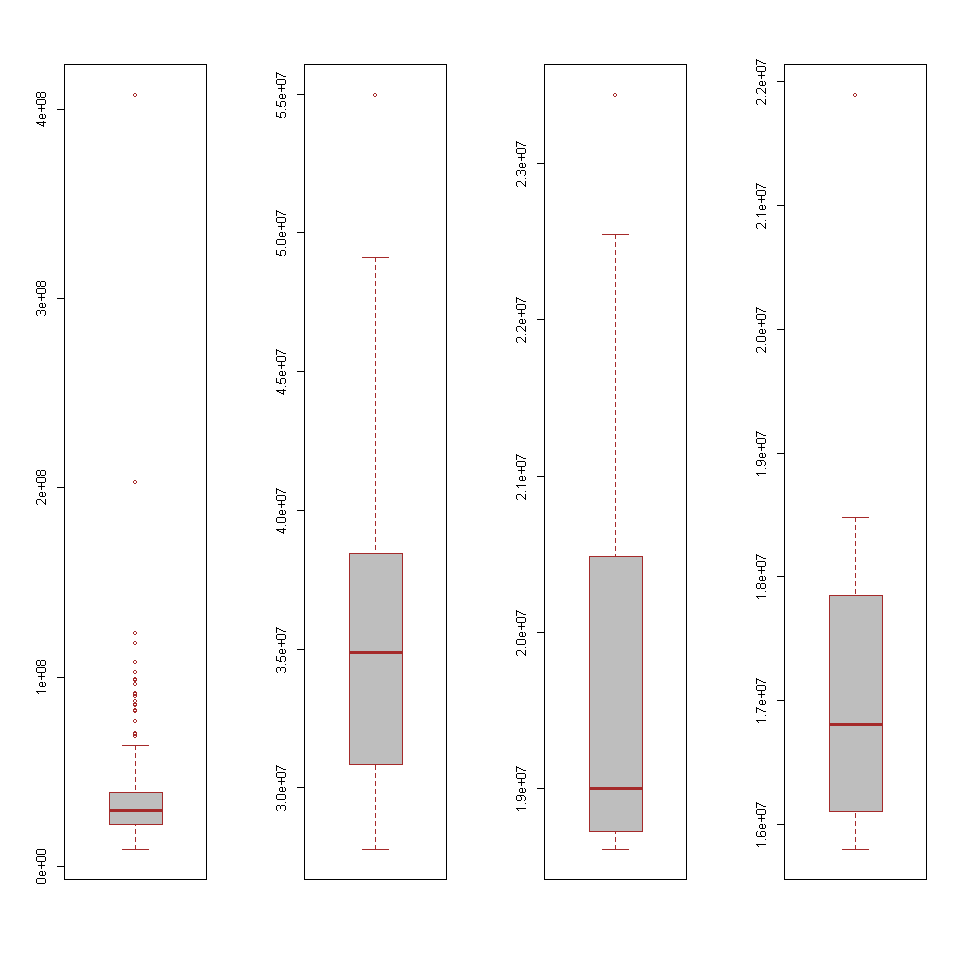

In [34]:
par(mfrow=c(1,4))
boxplot(data$grdp, col = 'gray', border = 'brown')
boxplot(data$income_ct, col = 'gray', border = 'brown')
boxplot(data$income_personal, col = 'gray', border = 'brown')
boxplot(data$consumption, col = 'gray', border = 'brown')

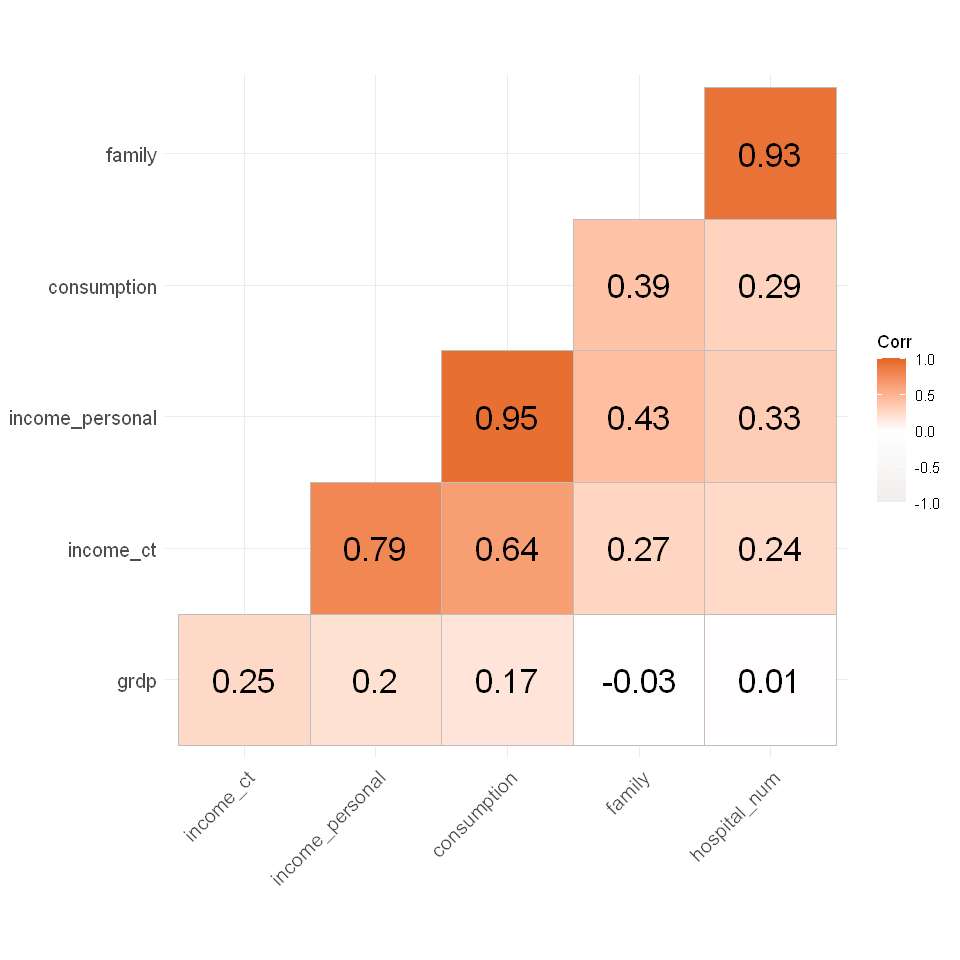

In [6]:
# 원 데이터셋 상관플랏
options(repr.plot.width = 8, repr.plot.height = 8)
ggcorrplot(cor(data[,-1]), type = "lower",
   colors = c("#f2eded", "white", "#E46726"), lab = TRUE, lab_size = 7)

경제 지표 관련 변수들 간 상관관계가 꽤 높은 상황! 처리가 필요해

## 첫번째,   
## grdp & economy(지역총소득 + 개인소득 + 민간지출)

In [7]:
data_twosum = data
data_twosum$economy = data_twosum$income_ct + data_twosum$income_personal + data_twosum$consumption
data_twosum = data_twosum[,c(1,2,8,7)]

In [8]:
data_twosum

sigungu,grdp,economy,family,hospital_num
<chr>,<dbl>,<dbl>,<int>,<int>
부산광역시 중구,70165363,67098058,23847,3
부산광역시 서구,28673507,67098058,53853,6
부산광역시 동구,53244385,67098058,46003,5
부산광역시 영도구,20566487,67098058,54903,5
부산광역시 부산진구,22040113,67098058,173263,30
부산광역시 동래구,14531938,67098058,114987,28
부산광역시 남구,21077476,67098058,117876,17
부산광역시 북구,9948792,67098058,120668,18
부산광역시 해운대구,20089234,67098058,171376,44


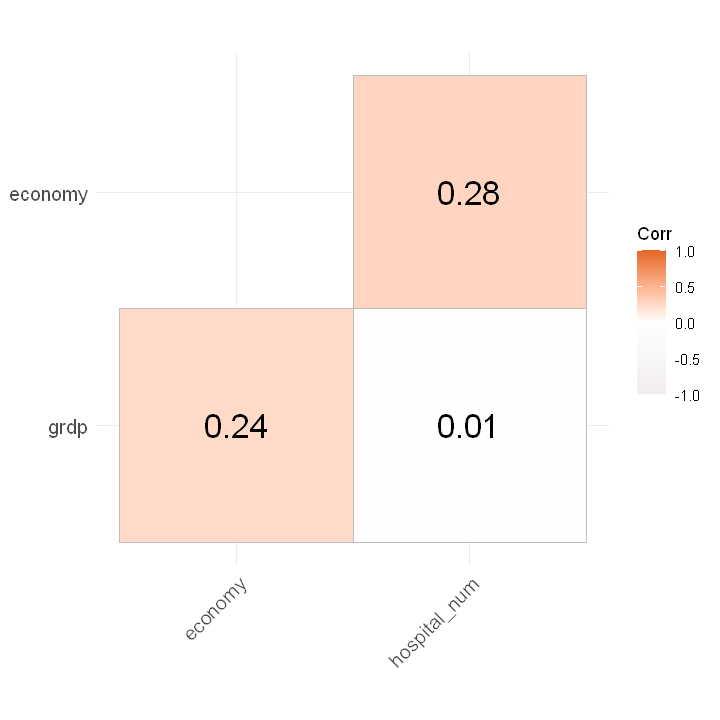

In [78]:
options(repr.plot.width = 6, repr.plot.height = 6)
ggcorrplot(cor(data_twosum[,-c(1,4)]), type = "lower",
   colors = c("#f2eded", "white", "#E46726"), lab = TRUE, lab_size = 7)

In [79]:
data_twosum = data_twosum[,-4]

In [80]:
data_twosum %>% head

,grdp,economy,family
,<dbl>,<dbl>,<int>
1,70165363,67098058,23847
2,28673507,67098058,53853
3,53244385,67098058,46003
4,20566487,67098058,54903
5,22040113,67098058,173263
6,14531938,67098058,114987


## 두번째,   
## economy(grdp + 지역총소득 + 개인소득 + 민간지출)

In [13]:
sum_data = data
sum_data$economy = sum_data$grdp + sum_data$income_ct + sum_data$income_personal + sum_data$consumption
sum_data = sum_data[,c(1,8,6,7)]

In [14]:
sum_data %>% head()

,sigungu,economy,family,hospital_num
,<chr>,<dbl>,<int>,<int>
1,부산광역시 중구,137263420,23847,3
2,부산광역시 서구,95771565,53853,6
3,부산광역시 동구,120342443,46003,5
4,부산광역시 영도구,87664545,54903,5
5,부산광역시 부산진구,89138171,173263,30
6,부산광역시 동래구,81629996,114987,28


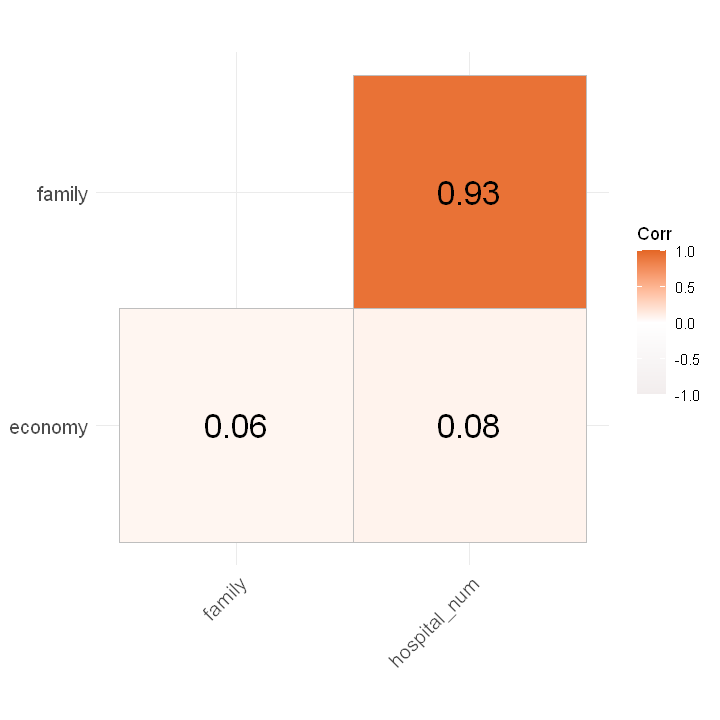

In [15]:
# corrplot
ggcorrplot(cor(sum_data[,-1]), type = "lower",
   colors = c("#f2eded", "white", "#E46726"), lab = TRUE, lab_size = 7)

## 세번째,   
## grdp & PC(지역총소득, 개인소득, 민간지출)

In [17]:
# (1) nonscaled
pca_three = data[,c(3,4,5)]

In [18]:
pca_three_nonsc = prcomp(pca_three)
summary(pca_three_nonsc)

Importance of components:
                             PC1       PC2       PC3
Standard deviation     6.923e+06 1.566e+06 2.731e+05
Proportion of Variance 9.499e-01 4.859e-02 1.480e-03
Cumulative Proportion  9.499e-01 9.985e-01 1.000e+00

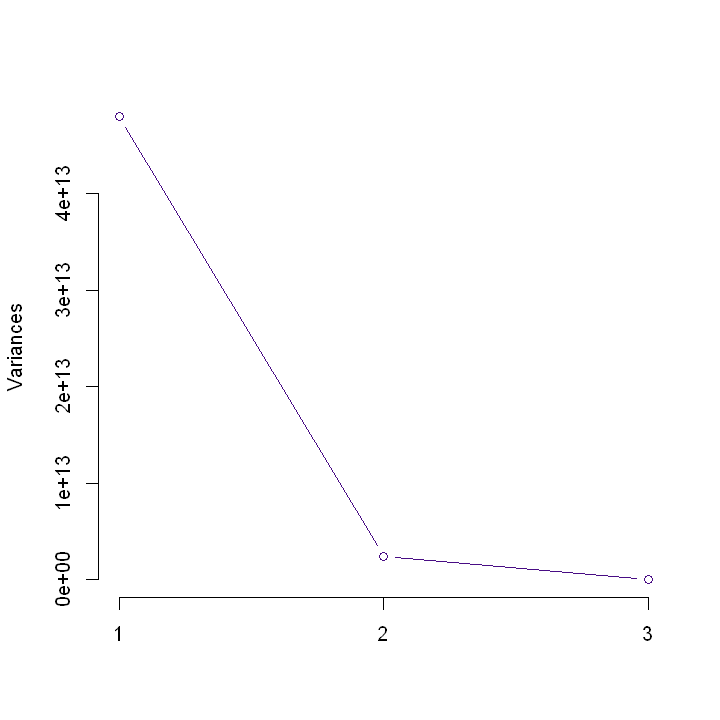

In [20]:
screeplot(pca_three_nonsc, main = "", col = "#490d85", type = "lines", pch = 1, npcs = length(pca_three_nonsc$sdev))

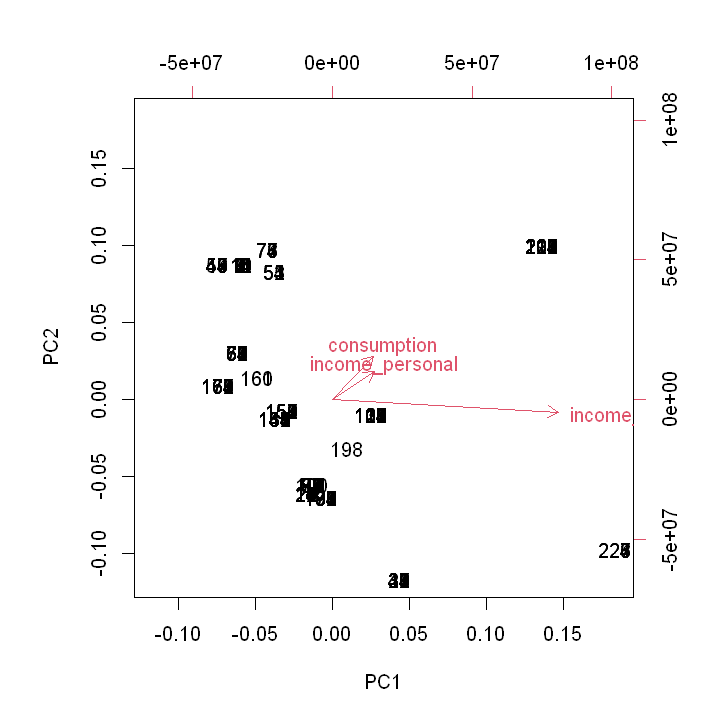

In [21]:
biplot(pca_three_nonsc)

* 빨간색 화살표는 주성분 벡터를 따라 각 변수들이 어떻게 변하는지 나타냄 
* 빨간색 화살표가 PC와 평행할수록 해당 PC에 큰 영향
* 빨간색 화살표 벡터의 길이가 원 변수의 분산을 표현하며, 길수록 분산이 큼
* 각 개체의 관찰값은 주성분점수로 하고, 각 변수와 주성분과의 관계를 나타내는 주성분 계수를 동시에 나타내어 이들의 관계를 살피려는 다변량 그래프 분석 기법
* 가까운 거리와 방향일수록 변수들의 상관성이 높은 것


'income'은 PC1에 대해 강한 양의 부하량, 나머지 두 개는 PC2에 대해 약간의 양의 부하량, 'income_personal'과 'consumption'은 EDA 결과와 일맥상통하게 역시 비슷한 추세. PC1은 income이 지배하고 있기에 주성분을 적어도 2개는 써야 할 것 같은데 변수 3개를 2개로? 어떤 의미가 있을까

In [23]:
pca_data_three_nonsc = data
pca_data_three_nonsc = cbind(pca_data_three_nonsc, pca_three_nonsc$x[,1:2])
pca_data_three_nonsc = pca_data_three_nonsc[,c(1,2,8,9,6,7)]
colnames(pca_data_three_nonsc) = c('sigungu', 'grdp', 'eco_PC1', 'eco_PC2', 'family', 'hospital_num')
pca_data_three_nonsc

sigungu,grdp,eco_PC1,eco_PC2,family,hospital_num
<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>
부산광역시 중구,70165363,-6153538,2074132,23847,3
부산광역시 서구,28673507,-6153538,2074132,53853,6
부산광역시 동구,53244385,-6153538,2074132,46003,5
부산광역시 영도구,20566487,-6153538,2074132,54903,5
부산광역시 부산진구,22040113,-6153538,2074132,173263,30
부산광역시 동래구,14531938,-6153538,2074132,114987,28
부산광역시 남구,21077476,-6153538,2074132,117876,17
부산광역시 북구,9948792,-6153538,2074132,120668,18
부산광역시 해운대구,20089234,-6153538,2074132,171376,44


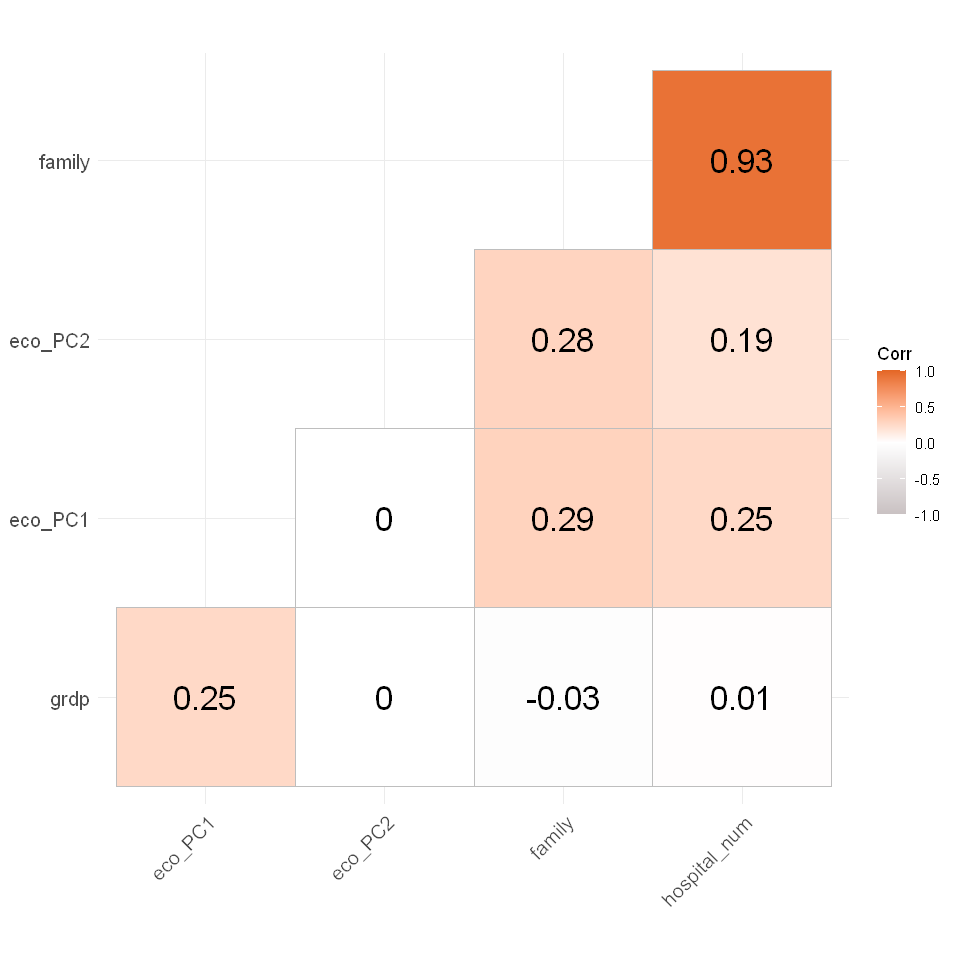

In [24]:
# corrplot
options(repr.plot.width = 8, repr.plot.height = 8)
ggcorrplot(cor(pca_data_three_nonsc[,-1]), type = "lower",
   colors = c("#c9c1c2", "white", "#E46726"), lab = TRUE, lab_size = 7)

In [25]:
# (2) scaled
pca_three = data[,c(3,4,5)]

In [35]:
pca_three_sc = prcomp(pca_three, center = TRUE, scale = TRUE)
summary(pca_three_sc)

Importance of components:
                          PC1    PC2     PC3
Standard deviation     1.6108 0.6143 0.16745
Proportion of Variance 0.8649 0.1258 0.00935
Cumulative Proportion  0.8649 0.9907 1.00000

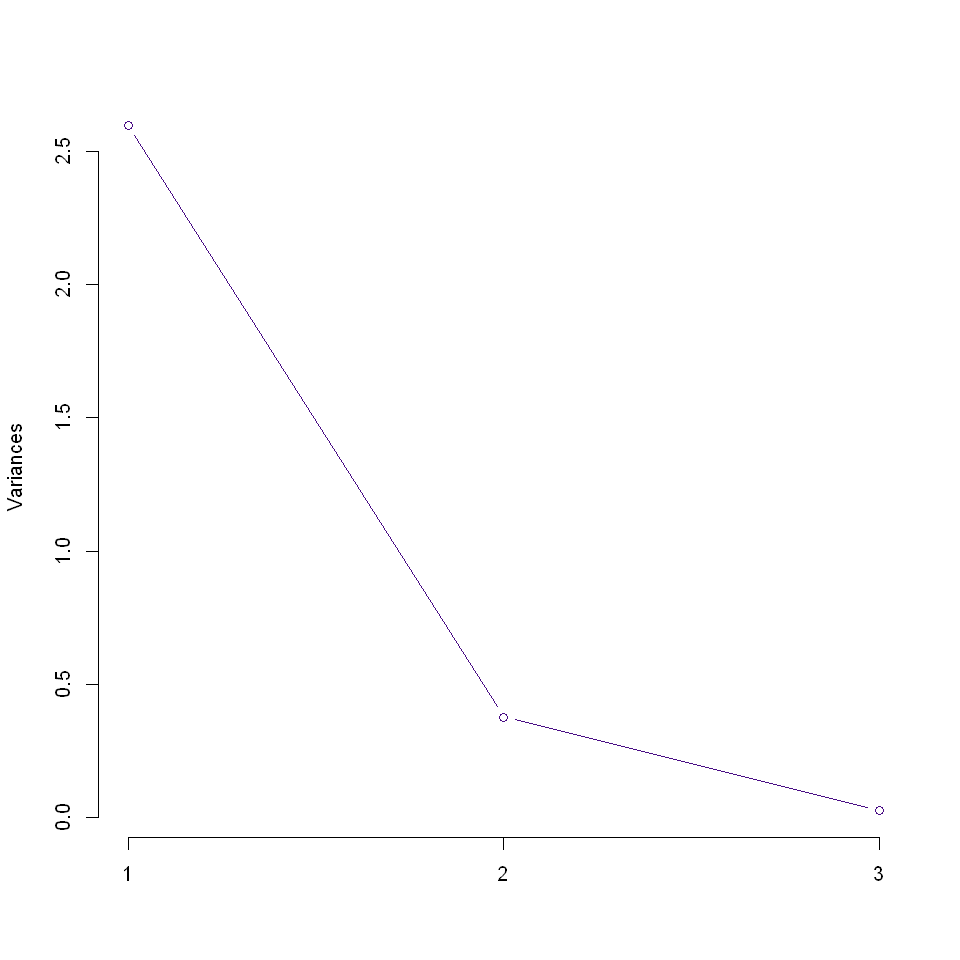

In [37]:
screeplot(pca_three_sc, main = "", col = "#490d85", type = "lines", pch = 1, npcs = length(pca_three_sc$sdev))

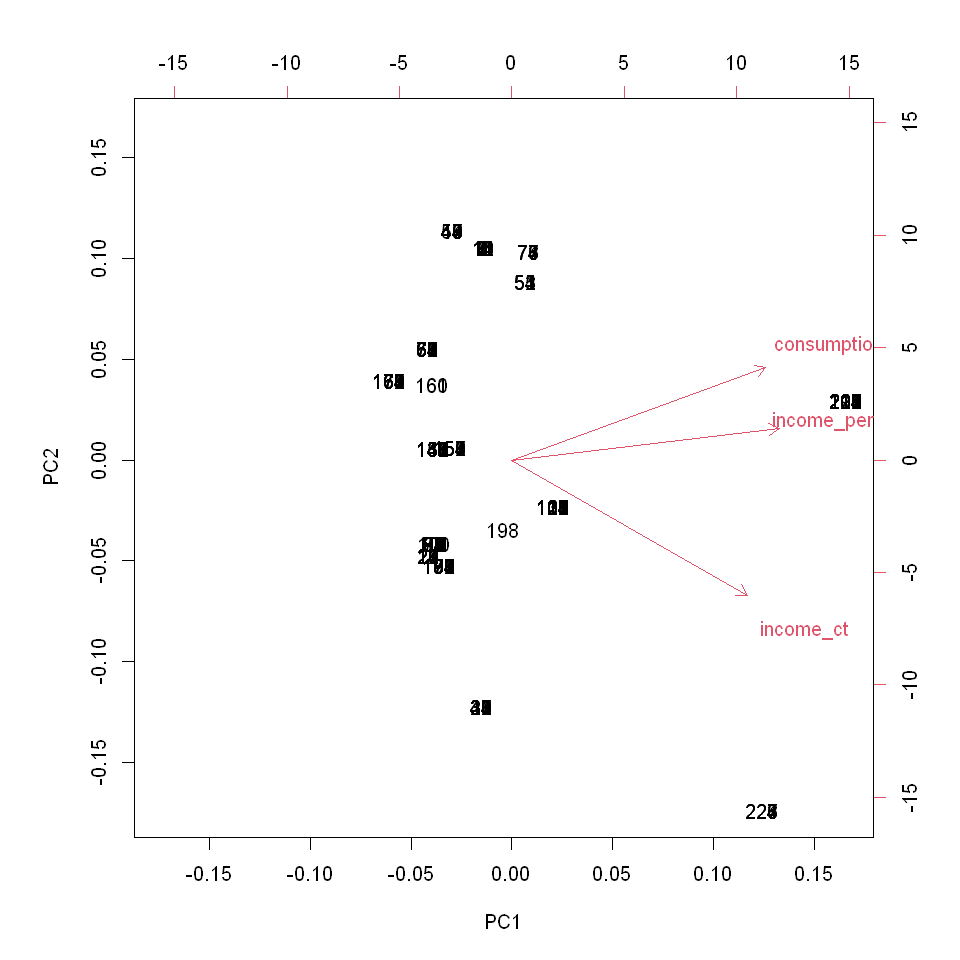

In [38]:
biplot(pca_three_sc)

In [85]:
print(pca_three_sc)

Standard deviations (1, .., p=3):
[1] 1.6107877 0.6142676 0.1674467

Rotation (n x k) = (3 x 3):
                      PC1        PC2        PC3
income_ct       0.5376423 -0.8115819 -0.2286388
income_personal 0.6114393  0.1885542  0.7684981
consumption     0.5805883  0.5529758 -0.5976078


In [74]:
data %>% head(3)

,sigungu,grdp,income_ct,income_personal,consumption,family,hospital_num
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,부산광역시 중구,70165363,29388155,19680320,18029583,23847,3
2,부산광역시 서구,28673507,29388155,19680320,18029583,53853,6
3,부산광역시 동구,53244385,29388155,19680320,18029583,46003,5


In [75]:
data %>% tail(3)

,sigungu,grdp,income_ct,income_personal,consumption,family,hospital_num
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
226,울산광역시 동구,61579936,54969109,22549503,18482422,65815,6
227,울산광역시 북구,53232899,54969109,22549503,18482422,83781,10
228,울산광역시 울주군,89800193,54969109,22549503,18482422,96160,21


In [77]:
pca_data_three_sc %>% head(3)

,sigungu,grdp,eco_PC1,eco_PC2,hospital_num
,<chr>,<dbl>,<dbl>,<dbl>,<int>
1,부산광역시 중구,70165363,-0.3408758,0.9802378,3
2,부산광역시 서구,28673507,-0.3408758,0.9802378,6
3,부산광역시 동구,53244385,-0.3408758,0.9802378,5


In [76]:
pca_data_three_sc %>% tail(3)

,sigungu,grdp,eco_PC1,eco_PC2,hospital_num
,<chr>,<dbl>,<dbl>,<dbl>,<int>
226,울산광역시 동구,61579936,3.019626,-1.611851,6
227,울산광역시 북구,53232899,3.019626,-1.611851,10
228,울산광역시 울주군,89800193,3.019626,-1.611851,21


In [39]:
pca_data_three_sc = data
pca_data_three_sc = cbind(pca_data_three_sc, pca_three_sc$x[,1:2])
pca_data_three_sc = pca_data_three_sc[,c(1,2,8,9,6,7)]
colnames(pca_data_three_sc) = c('sigungu', 'grdp', 'eco_PC1', 'eco_PC2', 'family', 'hospital_num')
pca_data_three_sc

sigungu,grdp,eco_PC1,eco_PC2,family,hospital_num
<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>
부산광역시 중구,70165363,-0.3408758,0.9802378,23847,3
부산광역시 서구,28673507,-0.3408758,0.9802378,53853,6
부산광역시 동구,53244385,-0.3408758,0.9802378,46003,5
부산광역시 영도구,20566487,-0.3408758,0.9802378,54903,5
부산광역시 부산진구,22040113,-0.3408758,0.9802378,173263,30
부산광역시 동래구,14531938,-0.3408758,0.9802378,114987,28
부산광역시 남구,21077476,-0.3408758,0.9802378,117876,17
부산광역시 북구,9948792,-0.3408758,0.9802378,120668,18
부산광역시 해운대구,20089234,-0.3408758,0.9802378,171376,44


In [81]:
pca_data_three_sc

sigungu,grdp,eco_PC1,eco_PC2,hospital_num
<chr>,<dbl>,<dbl>,<dbl>,<int>
부산광역시 중구,70165363,-0.3408758,0.9802378,3
부산광역시 서구,28673507,-0.3408758,0.9802378,6
부산광역시 동구,53244385,-0.3408758,0.9802378,5
부산광역시 영도구,20566487,-0.3408758,0.9802378,5
부산광역시 부산진구,22040113,-0.3408758,0.9802378,30
부산광역시 동래구,14531938,-0.3408758,0.9802378,28
부산광역시 남구,21077476,-0.3408758,0.9802378,17
부산광역시 북구,9948792,-0.3408758,0.9802378,18
부산광역시 해운대구,20089234,-0.3408758,0.9802378,44


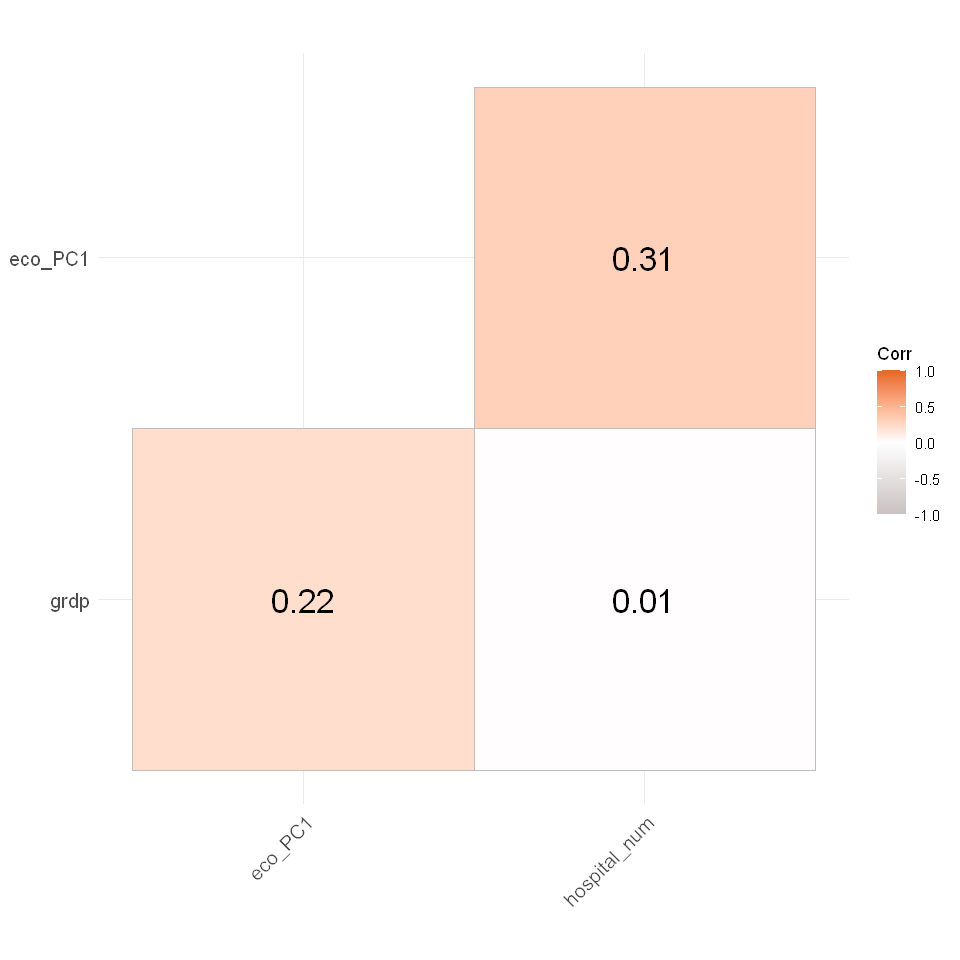

In [83]:
# corrplot
options(repr.plot.width = 8, repr.plot.height = 8)
ggcorrplot(cor(pca_data_three_sc[,-c(1,4)]), type = "lower",
   colors = c("#c9c1c2", "white", "#E46726"), lab = TRUE, lab_size = 7)

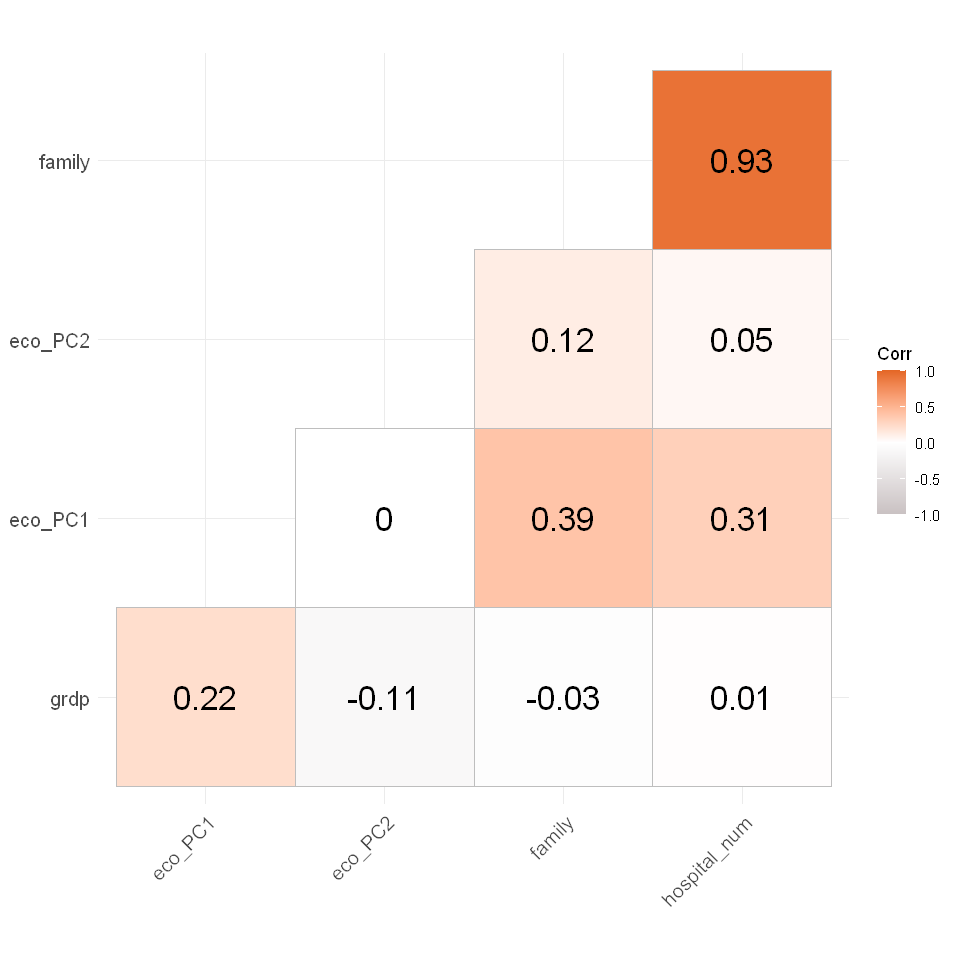

In [40]:
# corrplot
options(repr.plot.width = 8, repr.plot.height = 8)
ggcorrplot(cor(pca_data_three_sc[,-1]), type = "lower",
   colors = c("#c9c1c2", "white", "#E46726"), lab = TRUE, lab_size = 7)

In [64]:
# 만약 PC1만 사용한다면
pca_data_three_sc1 = data
pca_data_three_sc1 = cbind(pca_data_three_sc1, pca_three_sc$x[,1])
pca_data_three_sc1 = pca_data_three_sc1[,c(1,2,8,6,7)]
colnames(pca_data_three_sc1) = c('sigungu', 'grdp', 'eco_PC1', 'family', 'hospital_num')
pca_data_three_sc1

sigungu,grdp,eco_PC1,family,hospital_num
<chr>,<dbl>,<dbl>,<int>,<int>
부산광역시 중구,70165363,-0.3408758,23847,3
부산광역시 서구,28673507,-0.3408758,53853,6
부산광역시 동구,53244385,-0.3408758,46003,5
부산광역시 영도구,20566487,-0.3408758,54903,5
부산광역시 부산진구,22040113,-0.3408758,173263,30
부산광역시 동래구,14531938,-0.3408758,114987,28
부산광역시 남구,21077476,-0.3408758,117876,17
부산광역시 북구,9948792,-0.3408758,120668,18
부산광역시 해운대구,20089234,-0.3408758,171376,44


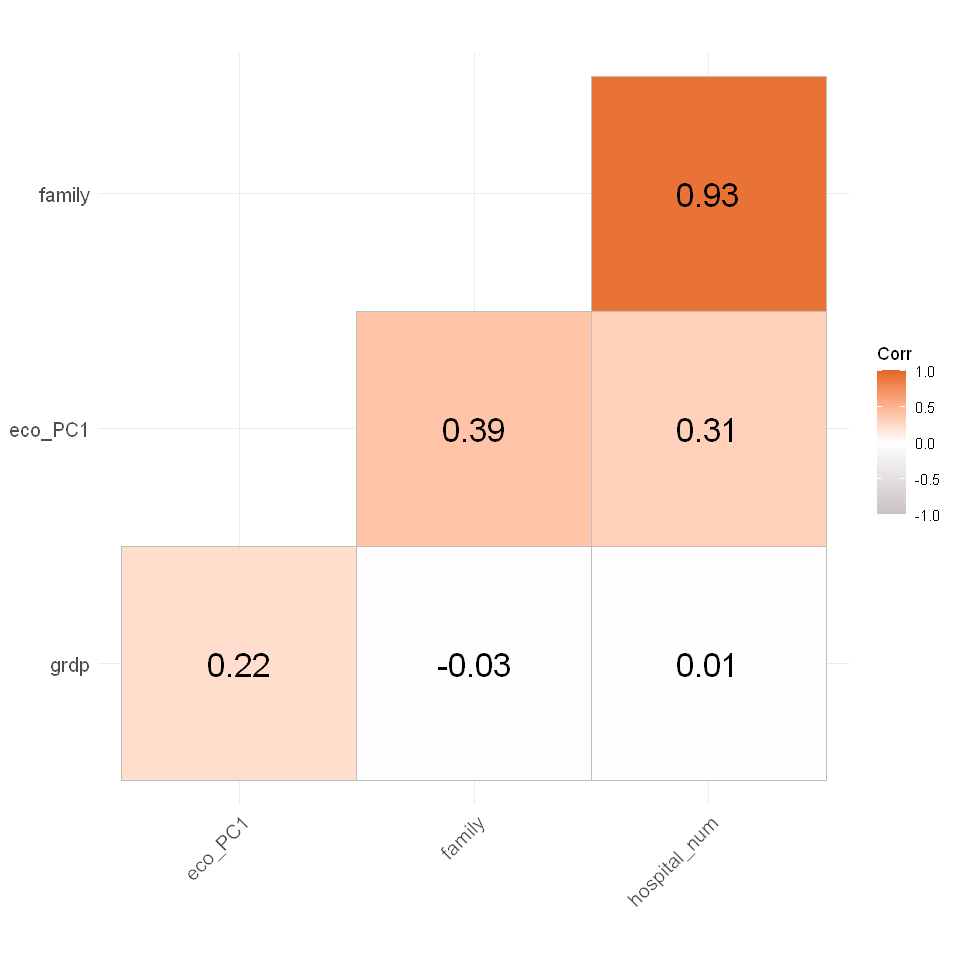

In [65]:
# corrplot
options(repr.plot.width = 8, repr.plot.height = 8)
ggcorrplot(cor(pca_data_three_sc1[,-1]), type = "lower",
   colors = c("#c9c1c2", "white", "#E46726"), lab = TRUE, lab_size = 7)

## 네번째,  
## 4가지 변수 모두에 대해 PCA

In [42]:
pca_for = data[,c(2,3,4,5)]

In [43]:
# (1) non-scaled
pca_nonscaled = prcomp(pca_for)
summary(pca_nonscaled)

Importance of components:
                             PC1       PC2       PC3       PC4
Standard deviation     3.382e+07 6.700e+06 1.566e+06 2.731e+05
Proportion of Variance 9.602e-01 3.768e-02 2.060e-03 6.000e-05
Cumulative Proportion  9.602e-01 9.979e-01 9.999e-01 1.000e+00

PC 1개로 분산의 96% 설명 가능.

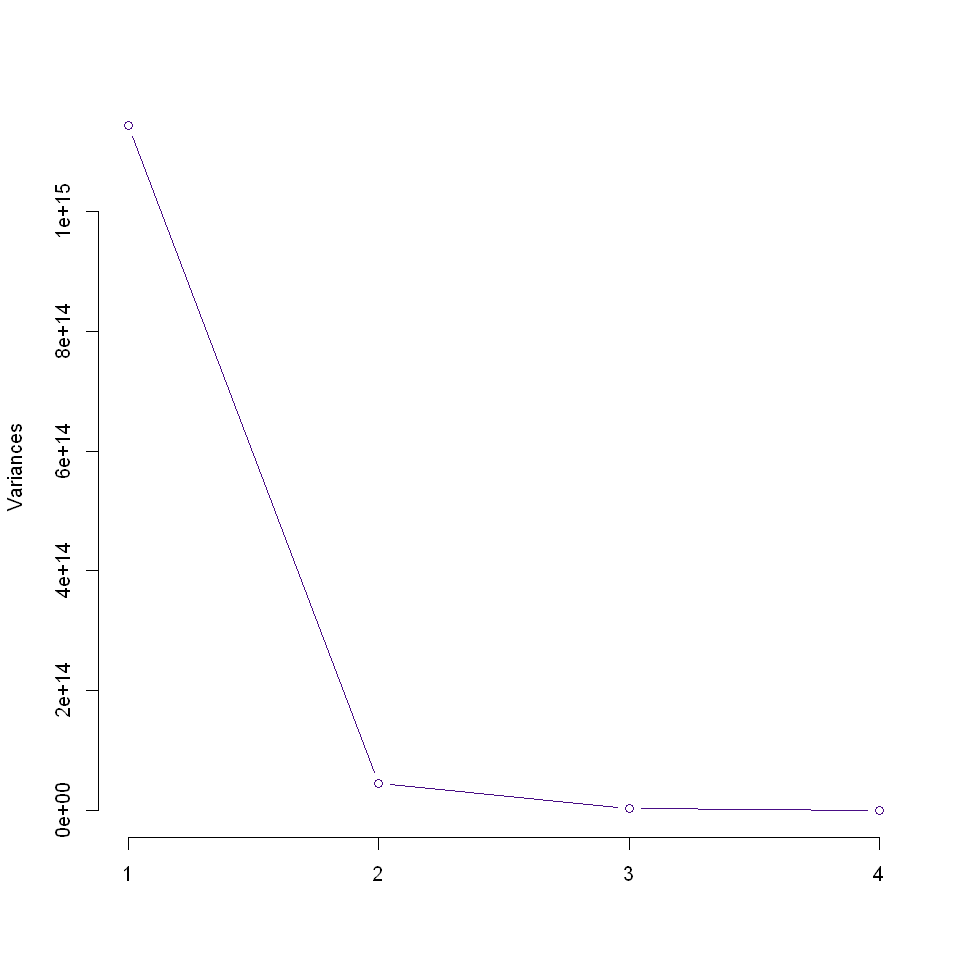

In [44]:
screeplot(pca_nonscaled, main = "", col = "#490d85", type = "lines", pch = 1, npcs = length(pca_nonscaled$sdev))

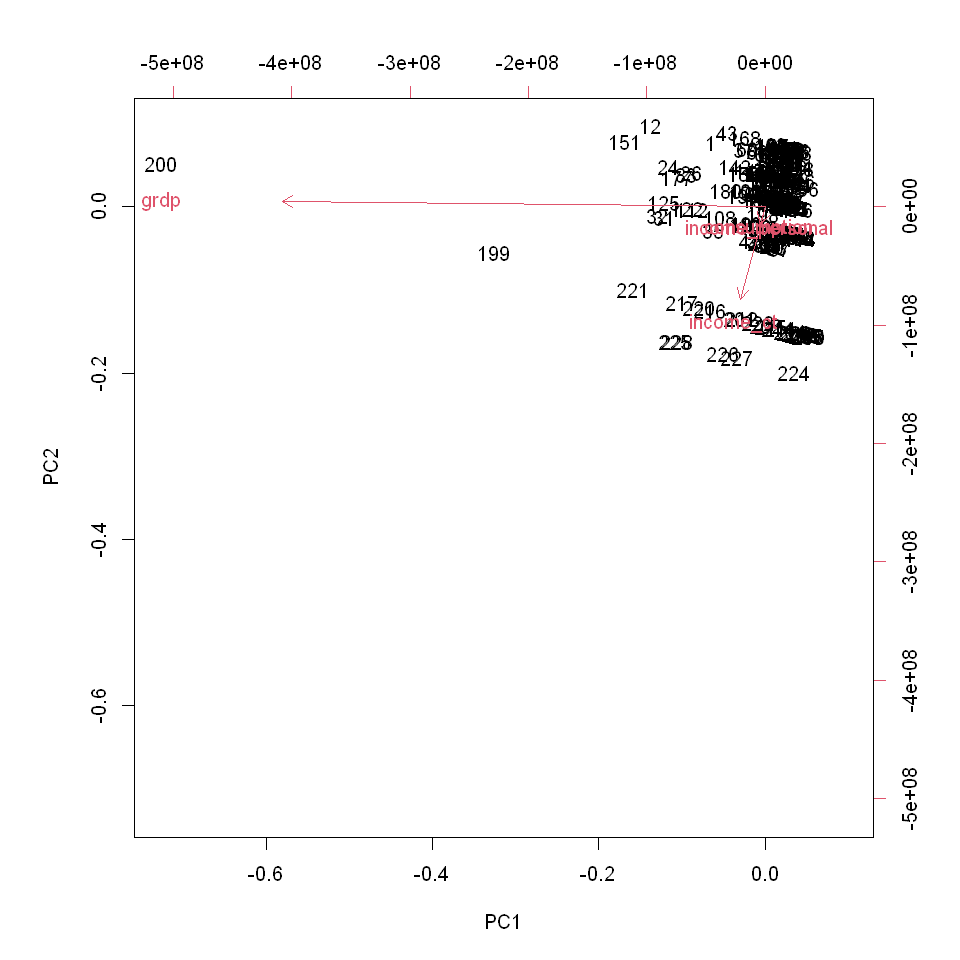

In [45]:
biplot(pca_nonscaled)

'grdp'는 PC1에 대해 강한 음의 부하량, 'income_ct'는 PC2에 대해 약간의 음의 부하량, 'income_personal'과 'consumption'은 EDA 결과와 일맥상통하게 역시 비슷한 추세. 두드러지는 몇개의 지역을 제외하고는 똘똘 뭉쳐있는 모습.

In [46]:
pca_data_nonsc = data
pca_data_nonsc = cbind(pca_data_nonsc, pca_nonscaled$x[,1:2])
pca_data_nonsc = pca_data_nonsc[,c(1,8,9,6,7)]
colnames(pca_data_nonsc) = c('sigungu', 'eco_PC1', 'eco_PC2', 'family', 'hospital_num')
pca_data_nonsc

sigungu,eco_PC1,eco_PC2,family,hospital_num
<chr>,<dbl>,<dbl>,<int>,<int>
부산광역시 중구,-32738993,7887661.0,23847,3
부산광역시 서구,8695325,5703331.1,53853,6
부산광역시 동구,-15841480,6996859.8,46003,5
부산광역시 영도구,16791103,5276538.7,54903,5
부산광역시 부산진구,15319520,5354117.5,173263,30
부산광역시 동래구,22817283,4958851.2,114987,28
부산광역시 남구,16280823,5303439.6,117876,17
부산광역시 북구,27394073,4717572.5,120668,18
부산광역시 해운대구,17267693,5251413.9,171376,44


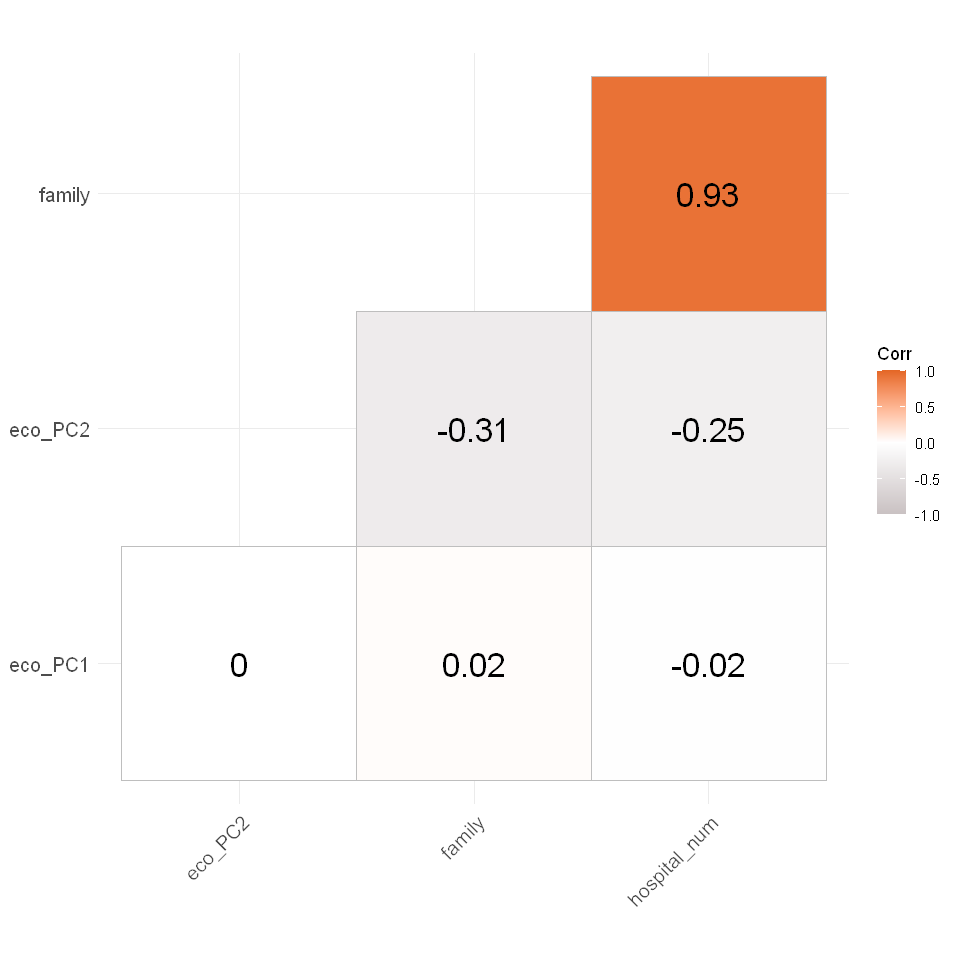

In [47]:
# corrplot
options(repr.plot.width = 8, repr.plot.height = 8)
ggcorrplot(cor(pca_data_nonsc[,-1]), type = "lower",
   colors = c("#c9c1c2", "white", "#E46726"), lab = TRUE, lab_size = 7)

In [48]:
# (2) scaled
pca_scaled = prcomp(pca_for, center = TRUE, scale = TRUE)
summary(pca_scaled)

Importance of components:
                          PC1    PC2     PC3    PC4
Standard deviation     1.6338 0.9663 0.60744 0.1674
Proportion of Variance 0.6673 0.2334 0.09224 0.0070
Cumulative Proportion  0.6673 0.9008 0.99300 1.0000

2개의 주성분만 사용해서 분산의 90% 설명 가능.

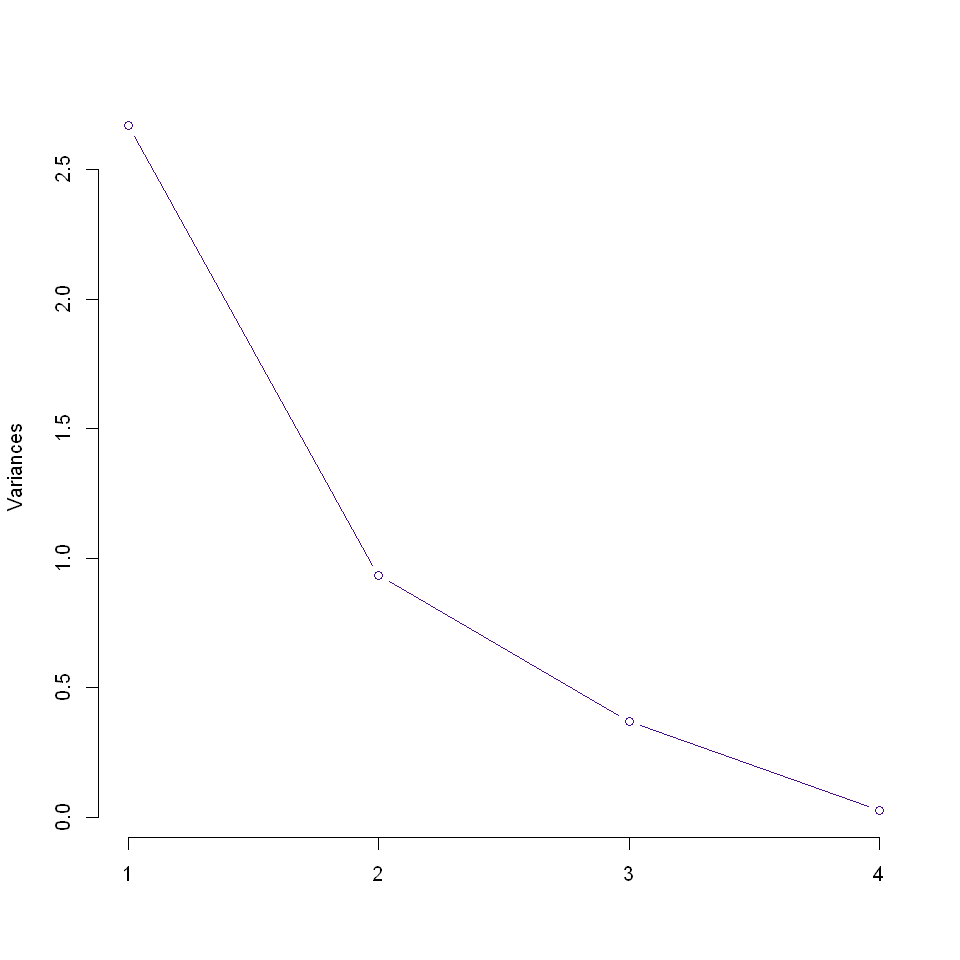

In [49]:
screeplot(pca_scaled, main = "", col = "#490d85", type = "lines", pch = 1, npcs = length(pca_scaled$sdev))

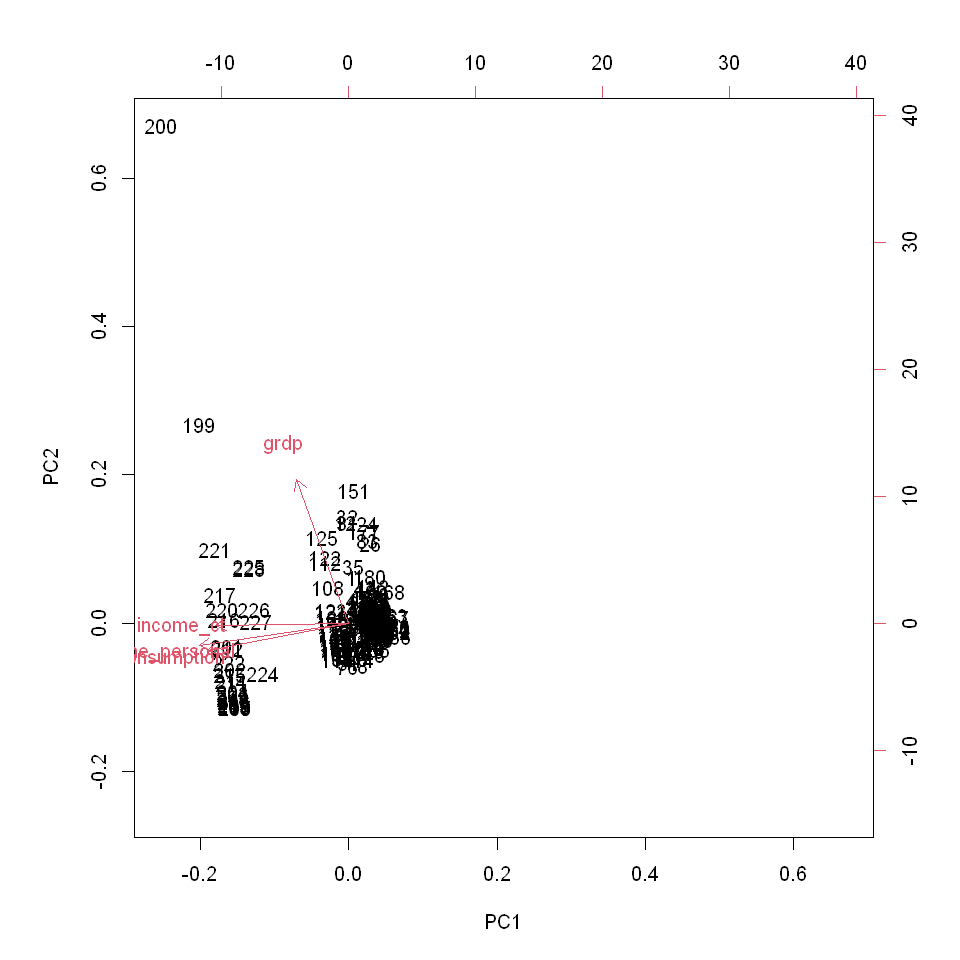

In [50]:
biplot(pca_scaled)

In [51]:
pca_data_sc = data
pca_data_sc = cbind(pca_data_sc, pca_scaled$x[,1:2])
pca_data_sc = pca_data_sc[,c(1,8,9,6,7)]
colnames(pca_data_sc) = c('sigungu', 'eco_PC1', 'eco_PC2', 'family', 'hospital_num')
pca_data_sc

sigungu,eco_PC1,eco_PC2,family,hospital_num
<chr>,<dbl>,<dbl>,<int>,<int>
부산광역시 중구,0.13677983,0.90397128,23847,3
부산광역시 서구,0.39094662,-0.28885488,53853,6
부산광역시 동구,0.24043271,0.41751956,46003,5
부산광역시 영도구,0.44060782,-0.52191907,54903,5
부산광역시 부산진구,0.43158082,-0.47955462,173263,30
부산광역시 동래구,0.47757367,-0.69540293,114987,28
부산광역시 남구,0.43747765,-0.50722893,117876,17
부산광역시 북구,0.50564866,-0.82716122,120668,18
부산광역시 해운대구,0.44353133,-0.53563933,171376,44


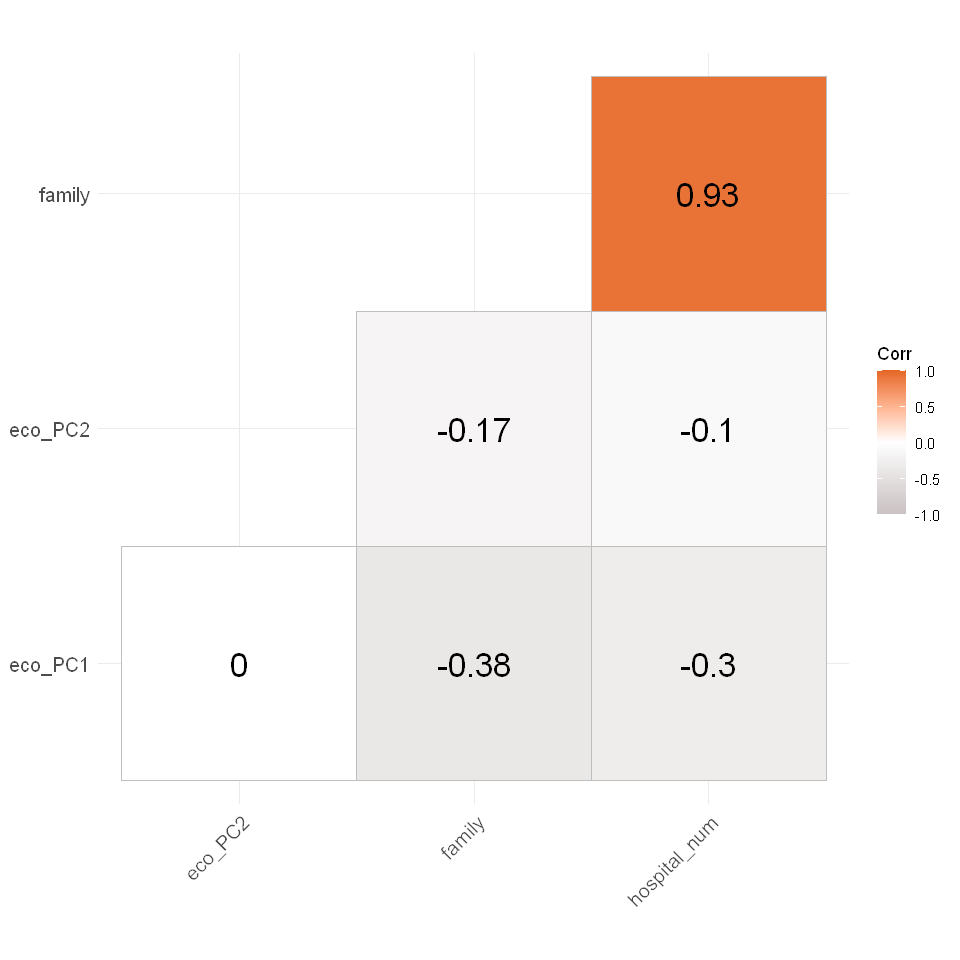

In [52]:
# corrplot
options(repr.plot.width = 8, repr.plot.height = 8)
ggcorrplot(cor(pca_data_sc[,-1]), type = "lower",
   colors = c("#c9c1c2", "white", "#E46726"), lab = TRUE, lab_size = 7)

* grdp & economy(3개 합): 상관관계가 조금은 남아있음
* economy(4개 합): 상관관계는 전혀 없지만, 슬기로운 방법은 아닌 것 같다는 생각
* grdp & PC: 상관관계 약하게 있음
* PC(4개 다): 상관관계 살짝 있음, 근데 grdp에 대한 차별점 X

PCA는 다중공선성을 해결하기 위함인데,  
원 데이터셋에서 grdp랑 income_ct, income_personal, consumption 간 상관관계는 그리 강하지 않았으니 grdp & PC를 택하는 게 상관관계 문제도 해결하고 특성의 추세도 보존할 수 있을 것 같기도 해..! 그리고 나는 PCA를 한다면 scaling을 하는 게 낫지 않을까 싶어

In [53]:
########################
# 주민등록세대 수, 동물병원 개수 PCA
# (2) scaled
pca_popul = data[,c(6,7)]

pca_popul = prcomp(pca_popul, center = TRUE, scale = TRUE)
summary(pca_popul)

Importance of components:
                          PC1     PC2
Standard deviation     1.3890 0.26596
Proportion of Variance 0.9646 0.03537
Cumulative Proportion  0.9646 1.00000

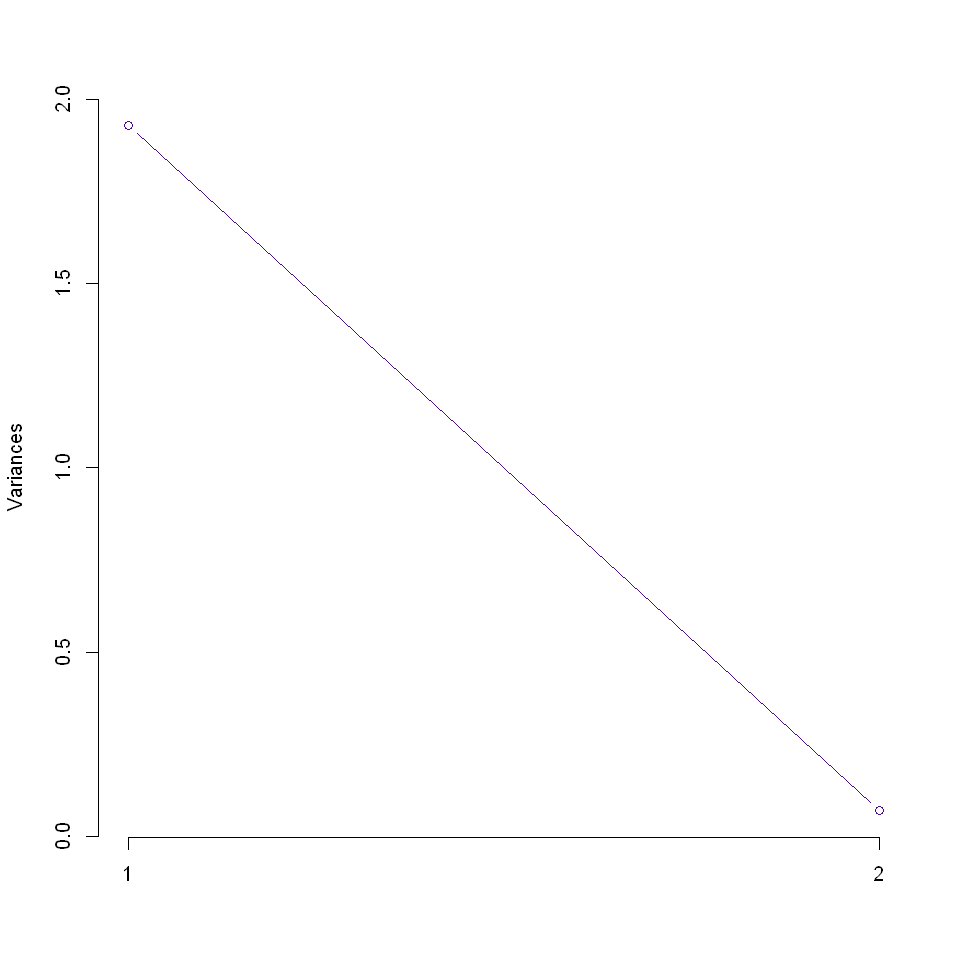

In [55]:
screeplot(pca_popul, main = "", col = "#490d85", type = "lines", pch = 1, npcs = length(pca_popul$sdev))

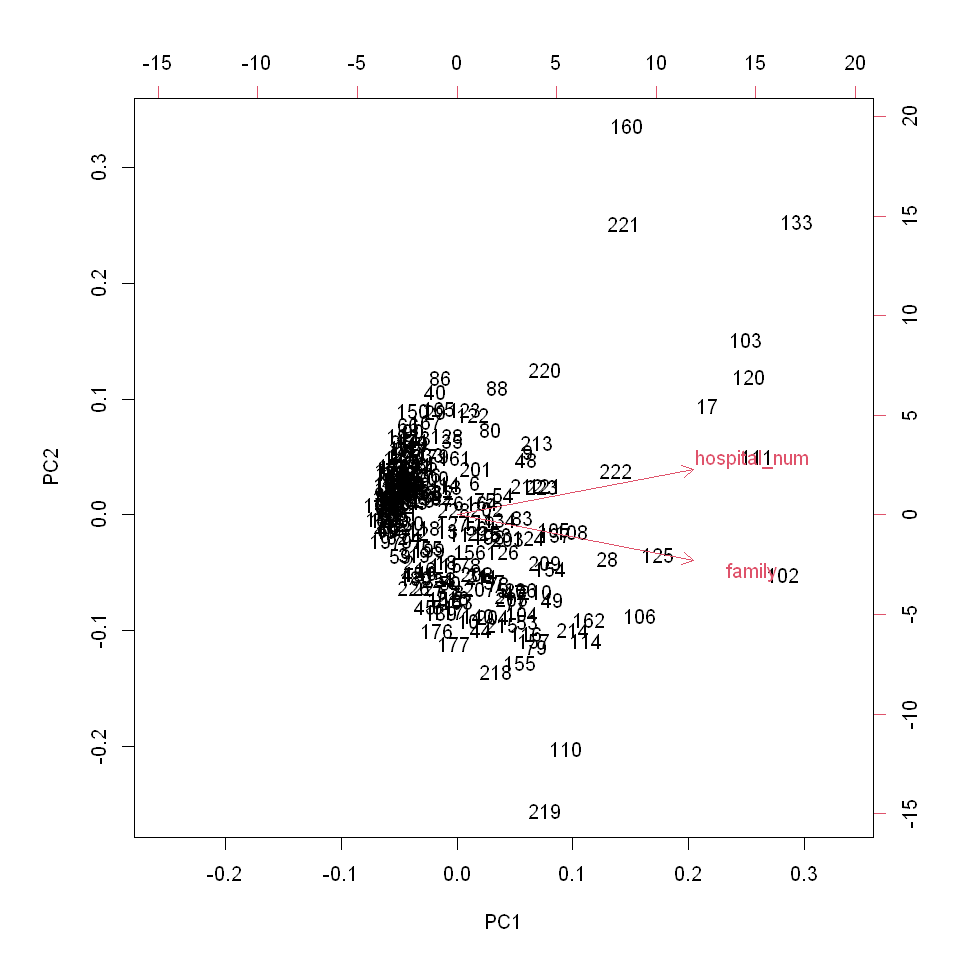

In [56]:
biplot(pca_popul)

In [58]:
pca_data_popul = data
pca_data_popul = cbind(pca_data_three_sc, pca_popul$x[,1])
pca_data_popul = pca_data_popul[,c(1,2,3,4,7)]
colnames(pca_data_popul) = c('sigungu', 'grdp', 'eco_PC1', 'eco_PC2', 'popul')
pca_data_popul

sigungu,grdp,eco_PC1,eco_PC2,popul
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
부산광역시 중구,70165363,-0.3408758,0.9802378,-1.18788185
부산광역시 서구,28673507,-0.3408758,0.9802378,-0.86228285
부산광역시 동구,53244385,-0.3408758,0.9802378,-0.95463083
부산광역시 영도구,20566487,-0.3408758,0.9802378,-0.88769464
부산광역시 부산진구,22040113,-0.3408758,0.9802378,0.83520044
부산광역시 동래구,14531938,-0.3408758,0.9802378,0.33029378
부산광역시 남구,21077476,-0.3408758,0.9802378,-0.01437463
부산광역시 북구,9948792,-0.3408758,0.9802378,0.03993254
부산광역시 해운대구,20089234,-0.3408758,0.9802378,1.28733108


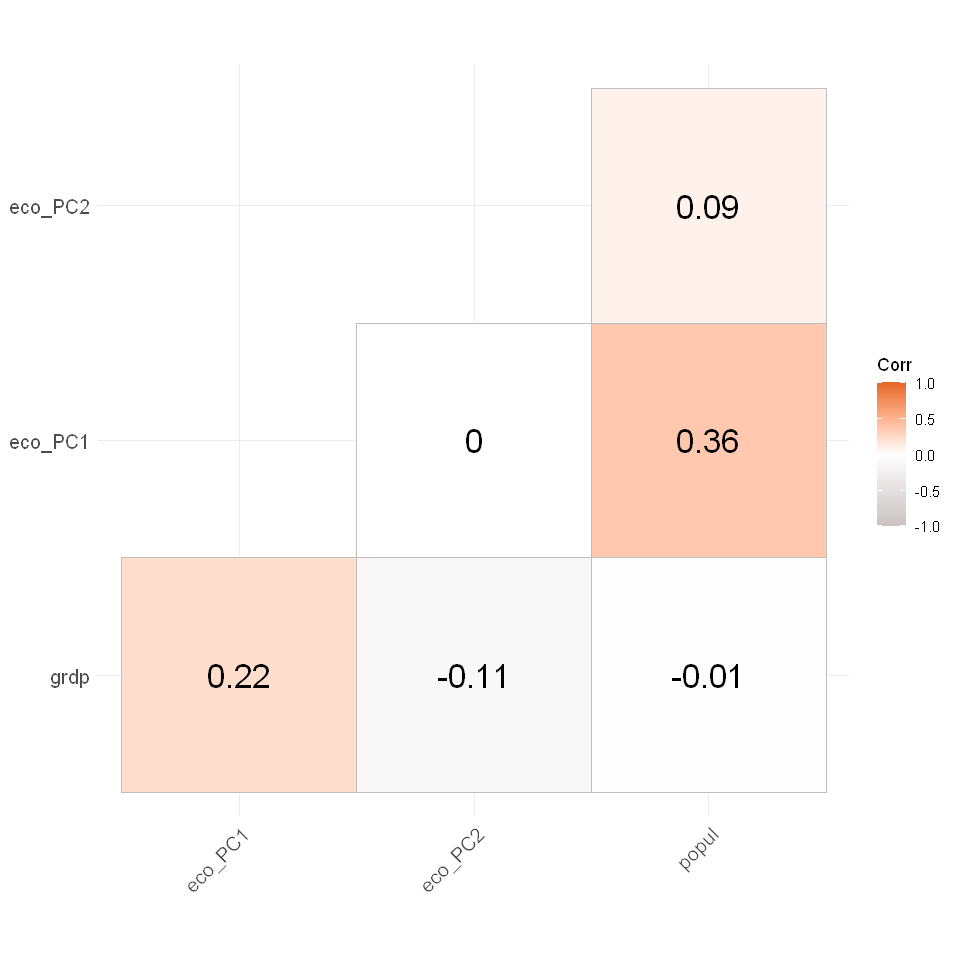

In [59]:
# corrplot
options(repr.plot.width = 8, repr.plot.height = 8)
ggcorrplot(cor(pca_data_popul[,-1]), type = "lower",
   colors = c("#c9c1c2", "white", "#E46726"), lab = TRUE, lab_size = 7)

In [61]:
pca_data_three_sc

sigungu,grdp,eco_PC1,eco_PC2,family,hospital_num
<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>
부산광역시 중구,70165363,-0.3408758,0.9802378,23847,3
부산광역시 서구,28673507,-0.3408758,0.9802378,53853,6
부산광역시 동구,53244385,-0.3408758,0.9802378,46003,5
부산광역시 영도구,20566487,-0.3408758,0.9802378,54903,5
부산광역시 부산진구,22040113,-0.3408758,0.9802378,173263,30
부산광역시 동래구,14531938,-0.3408758,0.9802378,114987,28
부산광역시 남구,21077476,-0.3408758,0.9802378,117876,17
부산광역시 북구,9948792,-0.3408758,0.9802378,120668,18
부산광역시 해운대구,20089234,-0.3408758,0.9802378,171376,44


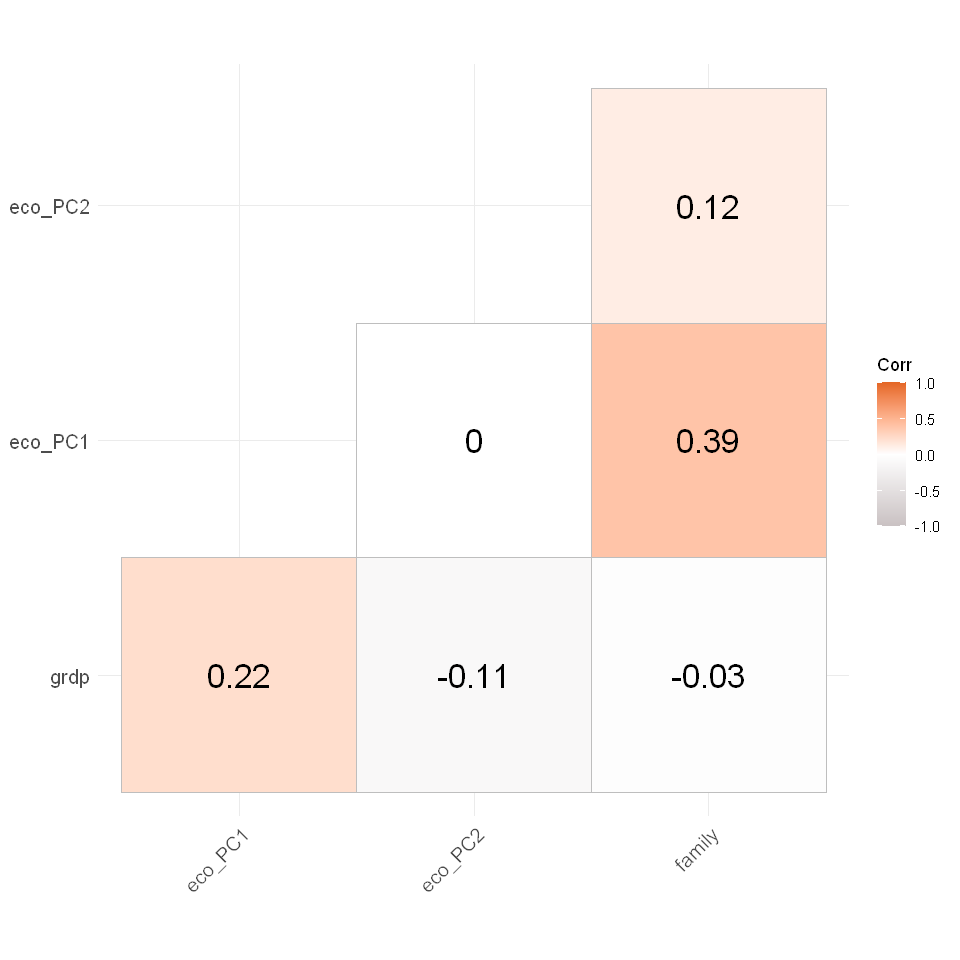

In [63]:
ggcorrplot(cor(pca_data_three_sc[,-c(1,6)]), type = "lower",
   colors = c("#c9c1c2", "white", "#E46726"), lab = TRUE, lab_size = 7)

In [67]:
pca_data_three_sc = pca_data_three_sc[,-5]

In [68]:
pca_data_three_sc %>% head()

,sigungu,grdp,eco_PC1,eco_PC2,hospital_num
,<chr>,<dbl>,<dbl>,<dbl>,<int>
1,부산광역시 중구,70165363,-0.3408758,0.9802378,3
2,부산광역시 서구,28673507,-0.3408758,0.9802378,6
3,부산광역시 동구,53244385,-0.3408758,0.9802378,5
4,부산광역시 영도구,20566487,-0.3408758,0.9802378,5
5,부산광역시 부산진구,22040113,-0.3408758,0.9802378,30
6,부산광역시 동래구,14531938,-0.3408758,0.9802378,28


In [71]:
write.csv(pca_data_three_sc, file = 'C:/Users/fleur/2021 P-SAT/주제분석/주제분석 2주차/데이터/care_province.csv', row.names = FALSE)